In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
races = pd.read_csv('Data/races.csv')
qualifying = pd.read_csv('Data/qualifying.csv')
results = pd.read_csv('Data/results.csv')

In [3]:
# Merge races and qualifying data
race_qualify = races.merge(qualifying, how='inner', on='raceId')
# Calculate the position of each driver at the end of the race
race_results = results.groupby(['raceId', 'driverId'])['position'].max().reset_index()

In [4]:
# Calculate the starting position of each driver
qualifying['qualifying_position'] = qualifying.groupby(['raceId', 'driverId'])['position'].min().reset_index(drop=True)
qualifying = qualifying.rename(columns={'position': 'grid_position'})

In [5]:
import numpy as np
race_positions = race_results.merge(qualifying[['raceId', 'driverId', 'grid_position', 'qualifying_position']], how='inner', on=['raceId', 'driverId'])
# Drop rows with missing or invalid values
race_positions['position'] = race_positions['position'].replace('\\N', np.nan)
race_positions = race_positions.dropna(subset=['position'])
race_positions['position'] = race_positions['position'].astype(int)
race_positions['position_difference'] = race_positions['grid_position'] - race_positions['position']

In [6]:
# Calculate the average finishing position for each starting position
avg_position = race_positions.groupby('grid_position')['position'].mean().reset_index()

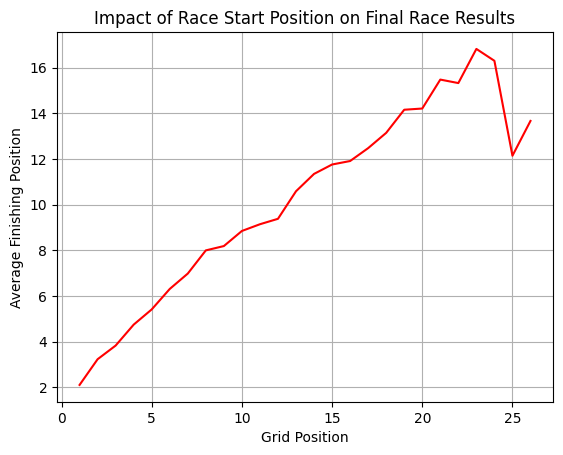

In [7]:
# Plot the average finishing position for each starting position
fig, ax = plt.subplots()
sns.lineplot(x='grid_position', y='position', data=avg_position, color='r', ax=ax)
ax.set_xlabel('Grid Position')
ax.set_ylabel('Average Finishing Position')
ax.set_title('Impact of Race Start Position on Final Race Results')
ax.grid(True) # Add grid
plt.show()

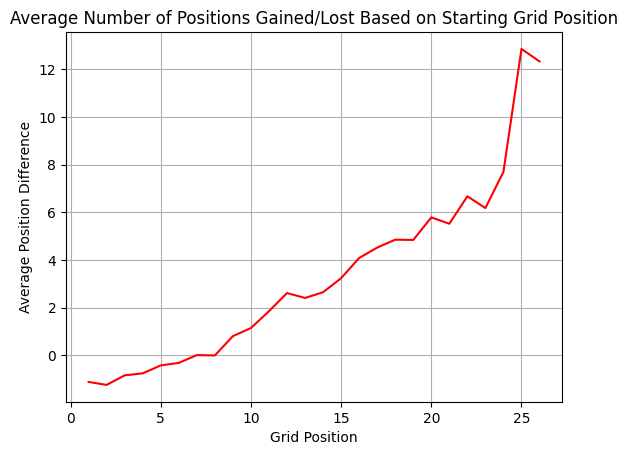

In [8]:
# Calculate the average position difference for each starting position
avg_diff = race_positions.groupby('grid_position')['position_difference'].mean().reset_index()

# Plot the average position difference for each starting position
fig, ax = plt.subplots()
sns.lineplot(x='grid_position', y='position_difference', data=avg_diff, color='r', ax=ax)
ax.set_xlabel('Grid Position')
ax.set_ylabel('Average Position Difference')
ax.set_title('Average Number of Positions Gained/Lost Based on Starting Grid Position')
ax.grid(True) # Add grid
plt.show()

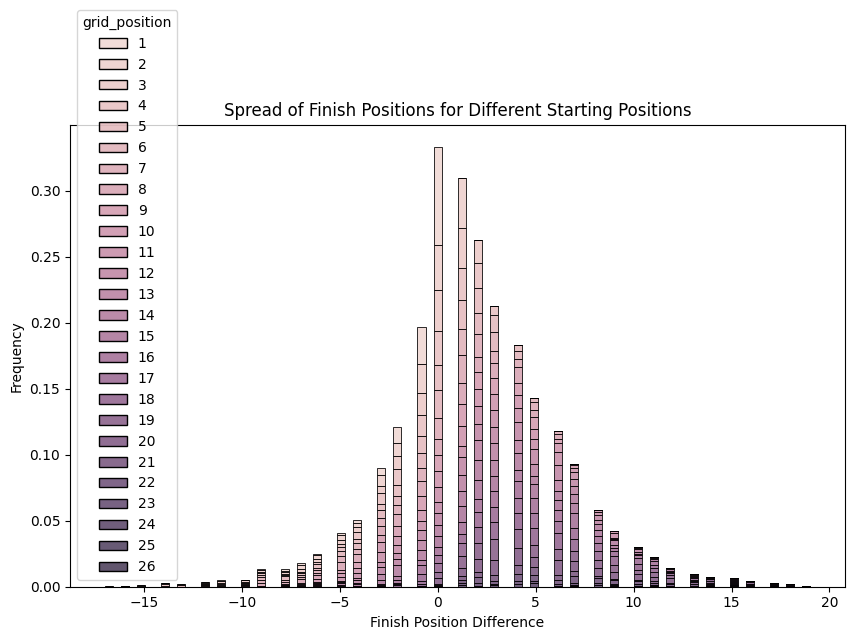

In [9]:
# Calculate the spread of finish positions for each starting position across multiple races
position_spread = race_positions.groupby('grid_position')['position'].std().reset_index()
position_spread = position_spread.rename(columns={'position': 'position_spread'})

# Plot the frequency of the spread of finish positions for each starting position
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=race_positions, x='position_difference', hue='grid_position', multiple='stack', ax=ax, stat='density')
ax.set_xlabel('Finish Position Difference')
ax.set_ylabel('Frequency')
ax.set_title('Spread of Finish Positions for Different Starting Positions')
plt.show()

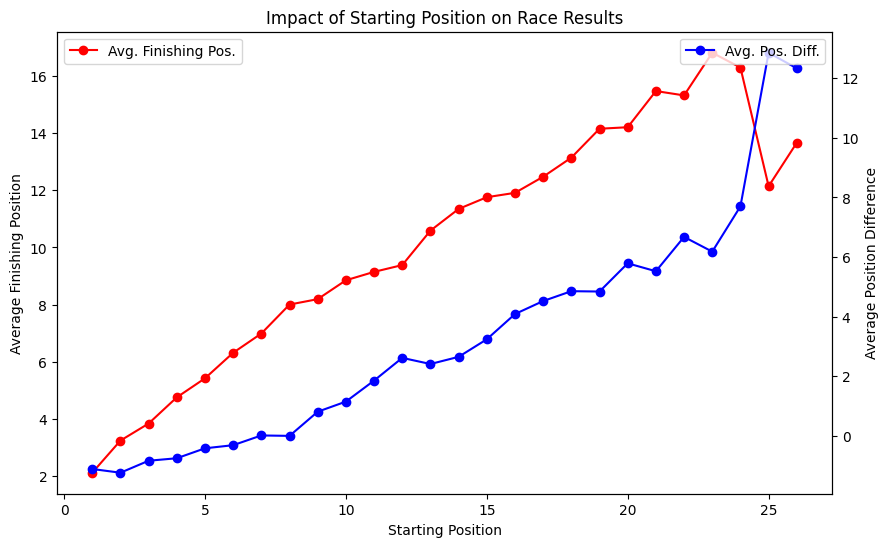

In [10]:
# Calculate the average finishing position and position difference for each starting position
avg_position = race_positions.groupby('grid_position')['position'].mean().reset_index()
avg_position_diff = race_positions.groupby('grid_position')['position_difference'].mean().reset_index()

# Create a figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

# Set labels and title
ax1.set_xlabel('Starting Position')
ax1.set_ylabel('Average Finishing Position')
ax2.set_ylabel('Average Position Difference')
ax1.set_title('Impact of Starting Position on Race Results')

# Plot data on the left y-axis
ax1.plot(avg_position['grid_position'], avg_position['position'], color='red', label='Avg. Finishing Pos.', marker='o')

# Plot data on the right y-axis
ax2.plot(avg_position_diff['grid_position'], avg_position_diff['position_difference'], color='blue', label='Avg. Pos. Diff.', marker='o')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()


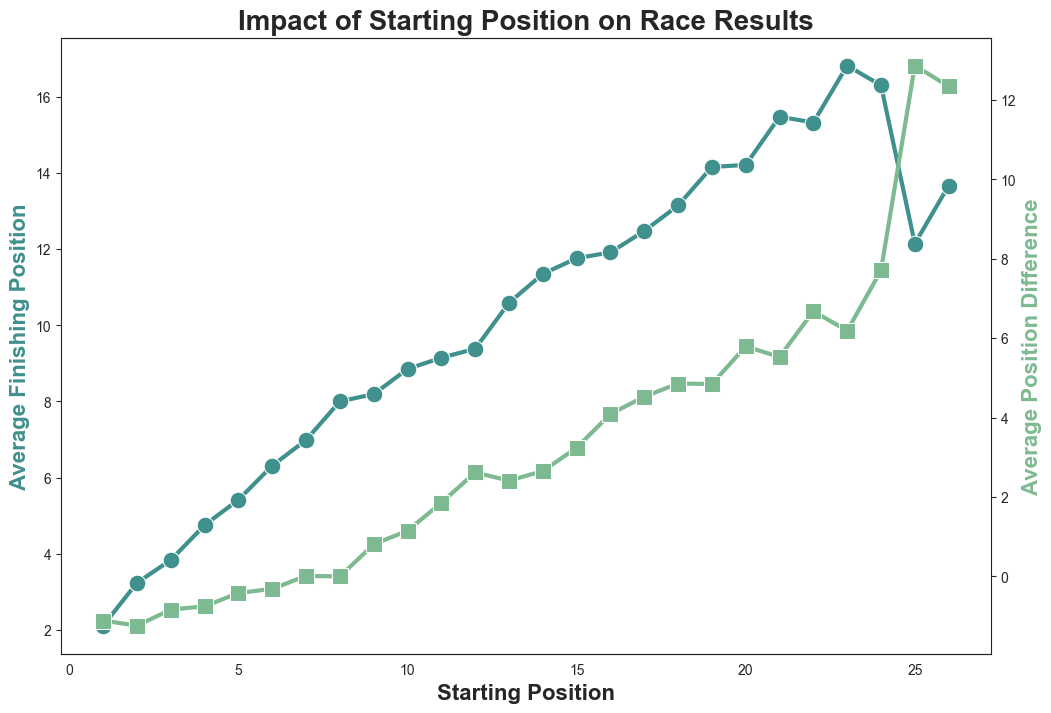

In [11]:
# Set style 
sns.set_style('white')

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

# Set labels and title
ax1.set_xlabel('Starting Position', fontweight='bold', fontsize=16)  
ax1.set_ylabel('Average Finishing Position', fontweight='bold', fontsize=16)  
ax2.set_ylabel('Average Position Difference', fontweight='bold', fontsize=16) 
plt.title('Impact of Starting Position on Race Results', fontweight='bold', fontsize=20)

# Plot data on the left y-axis 
sns.lineplot(ax=ax1, data=avg_position, x='grid_position', y='position', 
             color=sns.color_palette('crest')[2], linewidth=3, marker='o', markersize=12)

# Plot data on the right y-axis
sns.lineplot(ax=ax2, data=avg_position_diff, x='grid_position', y='position_difference',  
             color=sns.color_palette('crest')[0], linewidth=3, marker='s', markersize=12)  

# Remove spines
ax1.spines['right'].set_visible(False)  
ax2.spines['left'].set_visible(False)
ax1.yaxis.label.set_color(sns.color_palette('crest')[2])  
ax2.yaxis.label.set_color(sns.color_palette('crest')[0])   

# Show plot
plt.show() 

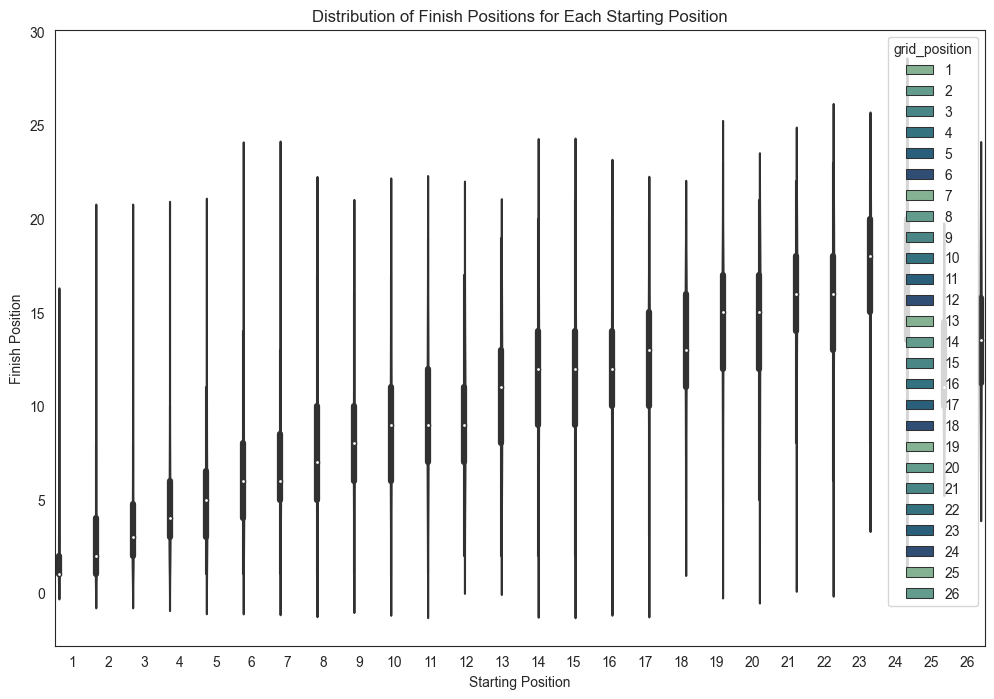

In [12]:
# Violin plot showing distribution of finish positions for each starting position
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(data=race_positions, x='grid_position', y='position', hue='grid_position', 
               palette=sns.color_palette('crest'), ax=ax)
ax.set_xlabel('Starting Position') 
ax.set_ylabel('Finish Position')
ax.set_title('Distribution of Finish Positions for Each Starting Position')
plt.show()

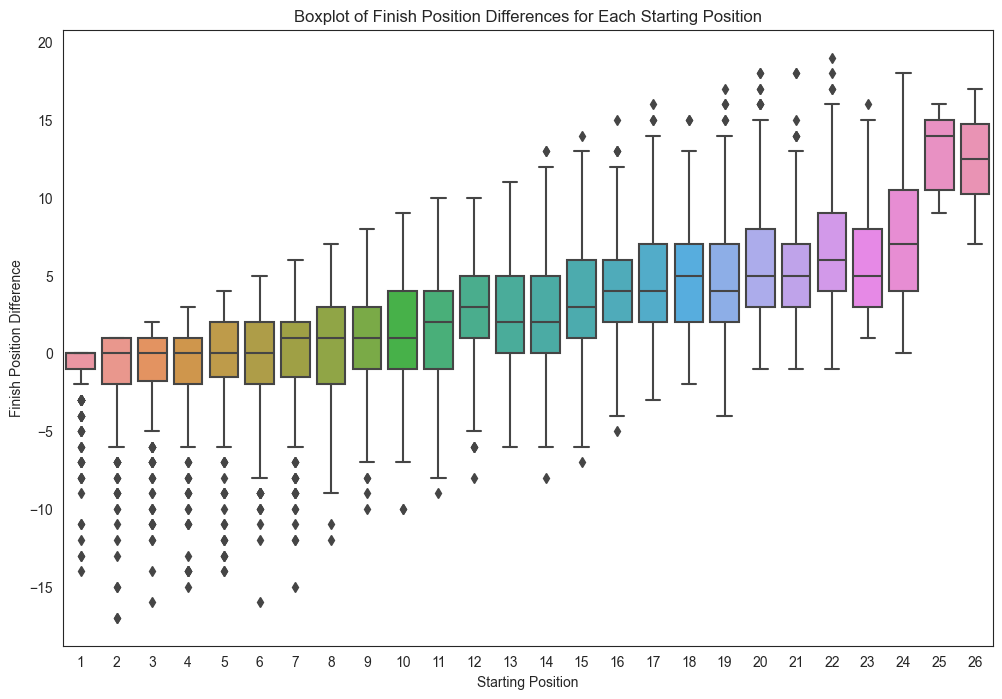

In [13]:
# Box plot showing distribution of finish position differences for each starting position
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=race_positions, x='grid_position', y='position_difference', ax=ax)
ax.set_xlabel('Starting Position')
ax.set_ylabel('Finish Position Difference')
ax.set_title('Boxplot of Finish Position Differences for Each Starting Position')
plt.show()